In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.time import Time

In [2]:
def mag_to_flux(mag, mag_err):
    flux = (np.power(10, -0.4 * mag)) * 3631 * 1000
    fluxerr = flux * ((np.power(10, 0.4 * mag_err) - 1))
    # print(flux, fluxerr)
    return flux, fluxerr


def power_law(x, a, b):
    return a * (x)**(-b)

def convert_time(time):
    return Time(time, format='isot', scale='utc').jd

In [4]:
t0 = 2460792.651909722 #EP t0 in JD

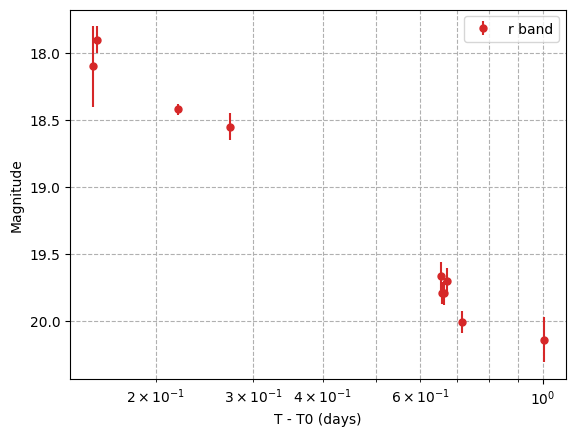

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
data = pd.read_csv('data.csv', sep=',')

# No need to split into magnitudes, errors, etc unless you want
t0 = 2460792.651909722

# Correct way to select r-band data
r_data = data[data["Filter"] == 'r']

fig, ax = plt.subplots()

# Now r_data is a dataframe, so this will work
ax.errorbar(r_data['Times']-t0, r_data['Magnitudes'], yerr=r_data['Magnitudes_err'],
            fmt='o', color='C3', markersize=5, label='r band')

ax.invert_yaxis()
ax.set_xlabel("T - T0 (days)")
ax.set_ylabel("Magnitude")

ax.set_xscale('log')
ax.legend()
ax.grid(True, which="both", ls="--")

plt.show()


In [6]:
flux, fluxerr = mag_to_flux(r_data['Magnitudes'].values, r_data['Magnitudes_err'].values)

In [7]:
times = r_data['Times'].values
t_t0 = times - t0  # (T - T0)

In [8]:
# Remove any zero or negative times (log problems)
mask = t_t0 > 0
times_shifted = t_t0[mask]
flux = flux[mask]
fluxerr = fluxerr[mask]

# Fit using curve_fit with errors
popt, pcov = curve_fit(power_law, times_shifted, flux, sigma=fluxerr, absolute_sigma=True)

A_fit, b_fit = popt
A_err, b_err = np.sqrt(np.diag(pcov))

print(f"Fitted A = {A_fit:.3e} ± {A_err:.3e}")
print(f"Fitted b = {b_fit:.3f} ± {b_err:.3f}")

Fitted A = 2.734e-02 ± 1.371e-03
Fitted b = 1.158 ± 0.042


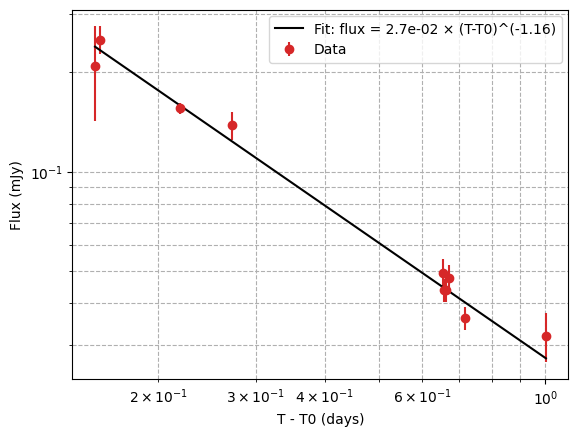

In [9]:
fig, ax = plt.subplots()

ax.errorbar(times_shifted, flux, yerr=fluxerr, fmt='o', color='C3', label='Data')

# Smooth model points
t_fit = np.logspace(np.log10(times_shifted.min()), np.log10(times_shifted.max()), 100)
flux_fit = power_law(t_fit, *popt)

ax.plot(t_fit, flux_fit, color='k', label=f'Fit: flux = {A_fit:.1e} × (T-T0)^(-{b_fit:.2f})')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("T - T0 (days)")
ax.set_ylabel("Flux (mJy)")
ax.legend()
ax.grid(True, which="both", ls="--")

plt.show()

In [10]:
np.sqrt(np.diag(pcov))

array([0.00137134, 0.04217208])

In [15]:
new_time = convert_time("2025-04-28T19:00:00") - t0

In [21]:
expected_flux = power_law(new_time, A_fit, b_fit)
print(expected_flux)


0.015419954165228974


In [24]:
expected_mag = -2.5 * np.log10(expected_flux)
print(expected_mag)

4.529792292985307


In [19]:
2.5 * np.log10(expected_flux)  # Convert flux back to magnitude

np.float64(-4.529792292985307)

In [38]:
import numpy as np

def flux_to_mag(flux):
    f0 = 3631  # Reference flux in mJy
    return -2.5 * np.log10(flux / f0)

flux = 1.542e-02  # mJy

# Calculate the magnitude
expected_magnitude = flux_to_mag(flux)

# Print the result
print(f"Expected magnitude: {expected_magnitude:.3f}")


Expected magnitude: 13.430


In [37]:
def flux_to_mag(flux):
    f0 = 3631 * A_fit  # Reference flux in mJy
    return -2.5 * np.log10(flux/f0)

# Calculate the magnitude from the expected flux
expected_magnitude = flux_to_mag(expected_flux)

# Print the expected magnitude
print(f"Expected magnitude at time {new_time} (T-T0 = {new_time_shifted:.4f} days) is {expected_magnitude:.3f}")


Expected magnitude at time 2460794.2916666665 (T-T0 = 1.6398 days) is 9.522


In [34]:
Time(t0, format = "jd").isot

'2025-04-27T03:38:45.000'

In [ ]:
expected_flux = power_law(new_time, t_fit, b_fit)
expected_flux

np.float64(1.0847524665052798e-09)

In [27]:
min(flux)

np.float64(0.031917307586129345)

In [14]:
new_time = convert_time("2025-04-28T19:00:00")
print(new_time)

2460794.2916666665
None


In [ ]:
obs_time = Time("2025-04-28T19:00:00", format='isot', scale='utc')
obs_time.jd
amplitude = 0.027491580756542615
exponent = 1.1491813954257404
exp_flux = amplitude * (obs_time.jd - 2460792.651909722)**(-exponent)
mag = -np.log10(exp_flux/(3631 * 1000))/0.4
exp_flux, mag

Predicted flux at time 2460794.2916666665 (T-T0 = 1.6398 days) is 1.542e-02 mJy
